In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
data = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0] # перша табл на сторінці
print(data.head()) # head() - перші 5 рядків, tail() - останні 5

In [5]:
# Визначте кількість рядків та стовпців у датафреймі
print(data.shape)

(28, 9)


In [ ]:
# Замініть у таблиці значення "—" на значення NaN
data.replace("—", pd.NA, inplace=True, regex=True)
print(data)

In [ ]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(data.dtypes)

In [8]:
# Замініть типи нечислових колонок на числові
# non_numeric_columns = data.select_dtypes(exclude=['number']).columns
# data[non_numeric_columns] = data[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')

In [ ]:
# Порахуйте, яка частка пропусків міститься в кожній колонці
missing = (data.isnull().sum() / len(data)) * 100
print(missing)

In [ ]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
data = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
data = data.drop(data.index[-1])
print(data)

In [ ]:
# Заміна відсутніх значень в стовпцях середніми значеннями
data = data.drop(data.index[-1])
data.fillna(data.mean(), inplace=True)
print(data)

In [ ]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

data['2019'] = pd.to_numeric(data['2019'], errors='coerce')

average_birth_rate_ukraine_2019 = data['2019'].mean()
regions_higher_than_average_ukraine_2019 = data[data['2019'] > average_birth_rate_ukraine_2019]['Регіон'].tolist()
print(regions_higher_than_average_ukraine_2019)

In [13]:
# У якому регіоні була найвища народжуваність у 2014 році?
data['2014'] = pd.to_numeric(data['2014'], errors='coerce')

index_highest_birth_rate_2014 = data['2014'].idxmax()
region_highest_birth_rate_2014 = data.loc[index_highest_birth_rate_2014, 'Регіон']
print(region_highest_birth_rate_2014)

Рівненська


<ipython-input-14-3262a65e904d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019.dropna(inplace=True)


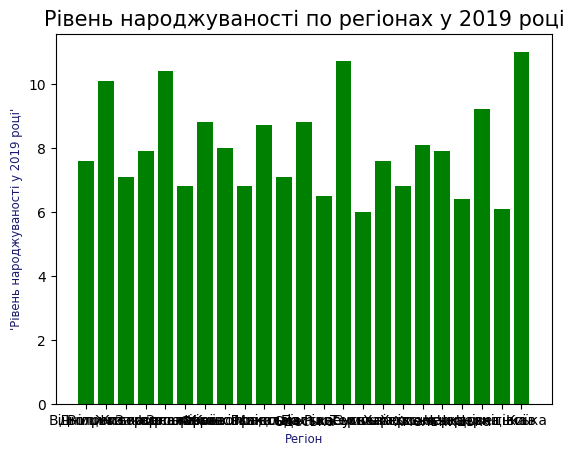

In [14]:
# Вибираємо дані для 2019 року
data_2019 = data[['Регіон', '2019']]

# Видаляємо рядки, де відсутні дані
data_2019.dropna(inplace=True)

##
plt.bar(data_2019['Регіон'], data_2019['2019'], color='green')
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("'Рівень народжуваності у 2019 році'", fontsize="small", color="midnightblue")
plt.title("Рівень народжуваності по регіонах у 2019 році", fontsize=15)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = data.drop(data.index[-1])
data['2019'] = pd.to_numeric(data['2019'], errors='coerce')
average_birth_rate_ukraine_2019 = data['2019'].mean()
regions_higher_than_average_ukraine_2019 = data[data['2019'] > average_birth_rate_ukraine_2019]

plt.figure(figsize=(8, 8))
plt.pie(regions_higher_than_average_ukraine_2019['2019'], labels=regions_higher_than_average_ukraine_2019['Регіон'], autopct='%1.1f%%')
plt.title('Birth Rate in Regions with Rates Higher than Average in Ukraine (2019)')
plt.axis('equal')
plt.show()


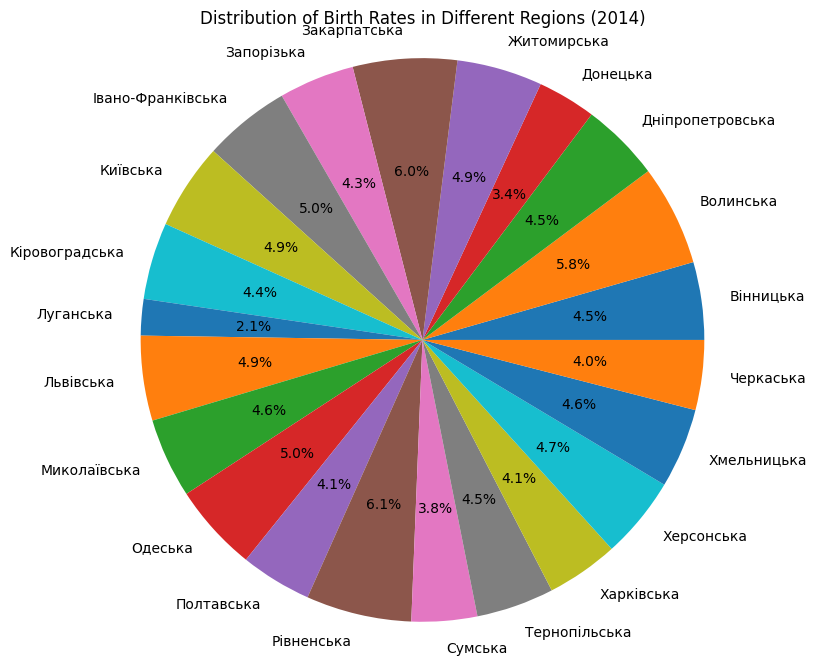

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have 'data' DataFrame with the required information
data['2014'] = pd.to_numeric(data['2014'], errors='coerce')
data.dropna(subset=['2014'], inplace=True)  # Drop rows with NaN values in the '2014' column

index_highest_birth_rate_2014 = data['2014'].idxmax()
region_highest_birth_rate_2014 = data.loc[index_highest_birth_rate_2014, 'Регіон']

# Plotting the birth rates in 2014 as a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(data['2014'], labels=data['Регіон'], autopct='%1.1f%%')
plt.title('Distribution of Birth Rates in Different Regions (2014)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


